In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%autoreload 2

In [25]:
%matplotlib inline

import dfmaker
import modelmaker
import AnaFunc

reload(dfmaker)
reload(modelmaker)
reload(AnaFunc)

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [26]:
myconfig = "/Users/ruthtoner/CodingMacros/ProjectInsight/myconfigs.cfg"

In [27]:
def DrawStuff(trained_model,trained_vocab,tagged_vocab,result,df_Test,title):
    AnaFunc.DrawROCandThresh(df_Test,result,title)
    #DrawScatter(df_Test,result,title)
    AnaFunc.DrawBestWords(trained_model,trained_vocab,tagged_vocab,title)

In [31]:
#Vectorizer:
vect_text = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500, \
                             max_df = 0.8)

vect_tag = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500, \
                             max_df = 0.8, \
                             binary = True)

    
#Models:

#Gaussian Naive Bayes:
gnb = GaussianNB()

#Random Forest:
forest = RandomForestClassifier(n_estimators = 100)

#Booster:
abc = AdaBoostClassifier(n_estimators = 100)

#SVM:
svc = SVC(kernel='linear',probability=True)

In [32]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("sw", forest, vect_text, vect_tag, myconfig)

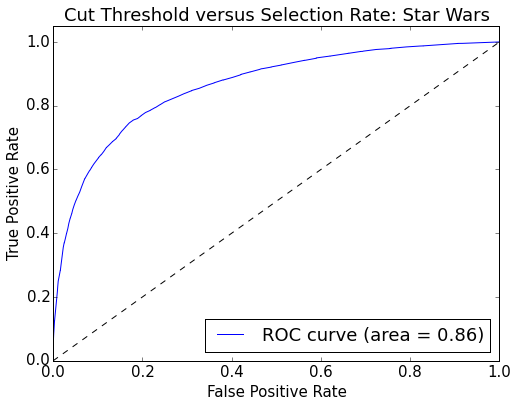

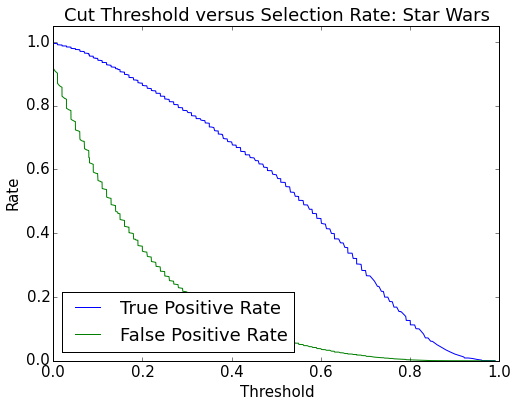

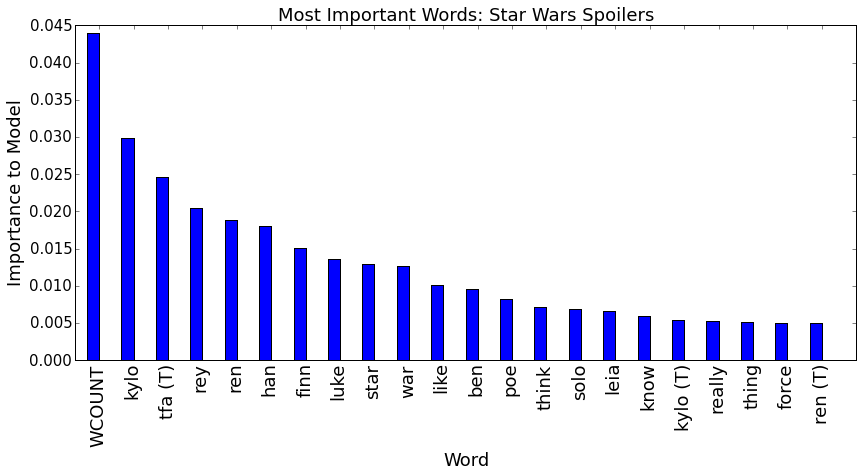

In [33]:
DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Star Wars")